# XG325: Explainable Artificial Intelligence
    
## Neural Networks (Regression)

**Week 08 | Lecture 04**

_Saturday, April 26, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Regression

In [2]:
# Load dataset
x = numpy.linspace(start=1, stop=2.8, num=1001).reshape(-1, 1)
y = 0.56*x**3 - 4*x**2 + 10*x - 7
y += numpy.random.normal(0, 0.1, size=(1001, 1))

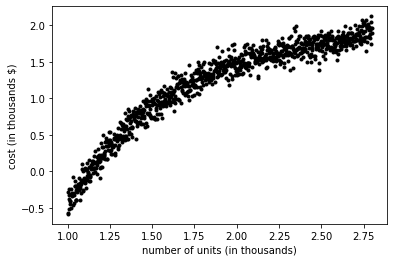

In [3]:
# Plot
plt.plot(x, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## The Smallest Neural Network

In [4]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(1,)),
    tensorflow.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['MSE', 'MAE']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""Train"""
model.fit(x, y, epochs=50, validation_data=(x,  y))

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 0.5265 - MSE: 0.5265 - MAE: 0.6631 - val_loss: 0.4694 - val_MSE: 0.4694 - val_MAE: 0.6272
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4254 - MSE: 0.4254 - MAE: 0.5970 - val_loss: 0.3796 - val_MSE: 0.3796 - val_MAE: 0.5653
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3449 - MSE: 0.3449 - MAE: 0.5387 - val_loss: 0.3115 - val_MSE: 0.3115 - val_MAE: 0.5113
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2852 - MSE: 0.2852 - MAE: 0.4877 - val_loss: 0.2600 - val_MSE: 0.2600 - val_MAE: 0.4643
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2416 - MSE: 0.2416 - MAE: 0.4451 - val_loss: 0.2225 - val_MSE: 0.2225 - val_MAE: 0.4244
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2097 - MSE: 0.2097 - MAE: 0.4089 - val_loss: 0.1969 - val_MSE: 0.1969 - val_MAE: 0.3924
Epoch 7/50
32/32 [==========

In [6]:
model.get_weights()

[array([[0.7192341]], dtype=float32), array([-0.14905374], dtype=float32)]

In [7]:
"""Evaluate"""
model.evaluate(x,  y, verbose=2)

32/32 - 0s - loss: 0.1000 - MSE: 0.1000 - MAE: 0.2243 - 43ms/epoch - 1ms/step


[0.10000553727149963, 0.10000553727149963, 0.2242598682641983]

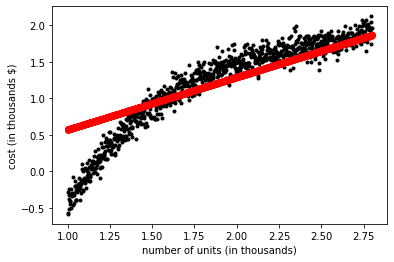

In [8]:
# Plot
plt.plot(x, y, 'k.')
plt.plot(x, model.predict(x), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## Larger Neural Network

In [9]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(1,)),
    tensorflow.keras.layers.Dense(300, activation='tanh'),
    tensorflow.keras.layers.Dense(300, activation='tanh'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['MSE', 'MAE']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 300)               600       
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""Train"""
model.fit(x, y, epochs=50, validation_data=(x,  y))

Epoch 1/50
32/32 [==============================] - 0s 6ms/step - loss: 0.4441 - MSE: 0.4441 - MAE: 0.5857 - val_loss: 0.4240 - val_MSE: 0.4240 - val_MAE: 0.5702
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4174 - MSE: 0.4174 - MAE: 0.5665 - val_loss: 0.3980 - val_MSE: 0.3980 - val_MAE: 0.5563
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3721 - MSE: 0.3721 - MAE: 0.5427 - val_loss: 0.3361 - val_MSE: 0.3361 - val_MAE: 0.5160
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3015 - MSE: 0.3015 - MAE: 0.4798 - val_loss: 0.2747 - val_MSE: 0.2747 - val_MAE: 0.4454
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2684 - MSE: 0.2684 - MAE: 0.4339 - val_loss: 0.2640 - val_MSE: 0.2640 - val_MAE: 0.4254
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2631 - MSE: 0.2631 - MAE: 0.4233 - val_loss: 0.2618 - val_MSE: 0.2618 - val_MAE: 0.4203
Epoch 7/50
32/32 [==========

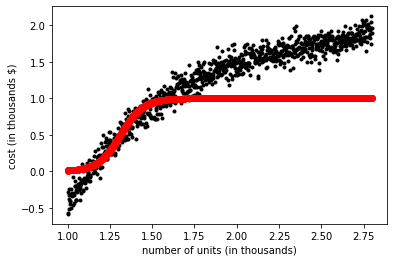

In [11]:
# Plot results
plt.plot(x, y, 'k.')
plt.plot(x, model.predict(x), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()